In [1]:
import fowl
import time
import importlib
import os
importlib.reload(fowl)

<module 'fowl' from 'X:\\Johannes_20211029\\fowl.py'>

In [2]:
import os

In [4]:
lamella1 = fowl.fowl_acquisition_area(name="lamella1_tomo",directory="./ER_Hox_grid1/lamella1_tomo/",beam_radius=0.44,start_from=-15.0,defocus=-4.0)
lamella2 = fowl.fowl_acquisition_area(name="lamella2_tomo",directory="./ER_Hox_grid1/lamella2_tomo/",beam_radius=0.44,start_from=-15.0,defocus=-4.0)
lamella3 = fowl.fowl_acquisition_area(name="lamella3_tomo",directory="./ER_Hox_grid1/lamella3_tomo/",beam_radius=0.44,start_from=-15.0,defocus=-4.0)
lamella4 = fowl.fowl_acquisition_area(name="lamella4_tomo",directory="./ER_Hox_grid1/lamella4_tomo/",beam_radius=0.44,start_from=-15.0,defocus=-4.0)

In [5]:
lamella1.initialize_from_navigator(item=8)
lamella2.initialize_from_navigator(item=13)
lamella3.initialize_from_navigator(item=18)
lamella4.initialize_from_navigator(item=23)

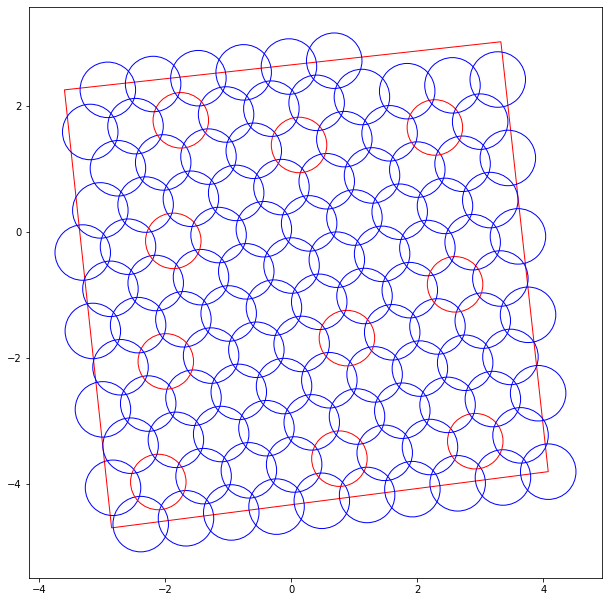

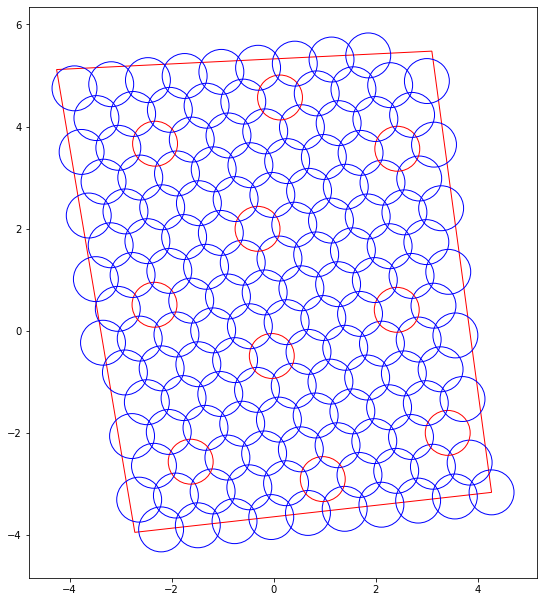

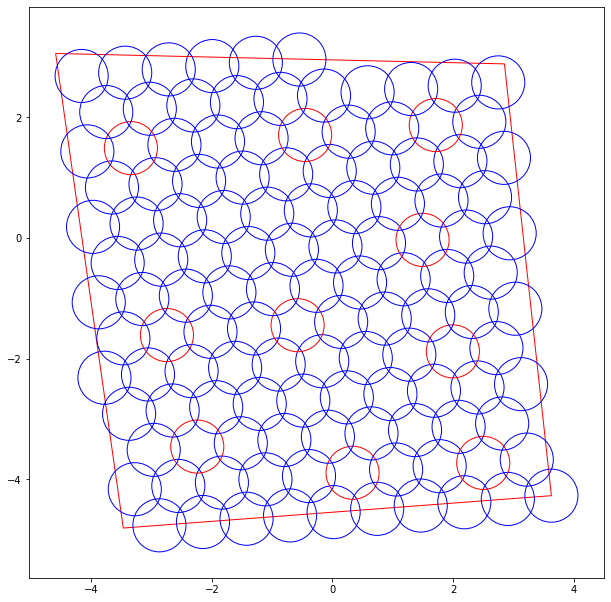

In [15]:
for lamella in [lamella2,lamella3,lamella4]:
    lamella.calculate_acquisition_positions(expansion=1.0)
    lamella.designate_calibration_positions()
    lamella.plot_acquisition_positions()
    lamella.write_to_disk()

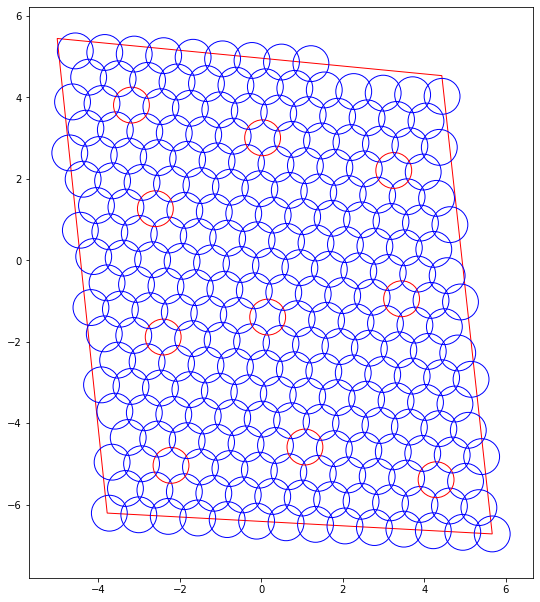

In [9]:
lamella1.calculate_acquisition_positions(expansion=1.0)
lamella1.designate_calibration_positions()
lamella.plot_acquisition_positions()
lamella1.write_to_disk()

In [10]:
lamella=lamella1
lamella.acquire_data(-15.0)

In [14]:
for i in range(34):
    i+=1
    tilt = lamella1.state["tilts"][i]
    fowl.serialem.ManageDewarsAndPumps()
    while fowl.serialem.AreDewarsFilling():
        time.sleep(60)
    lamella.perform_defocus_calibration(tilt,use_existing_tilt=True)
    lamella.analyze_defocus_calibration(tilt)
    lamella.acquire_data(tilt)
    lamella.write_to_disk()

Calibrating, starting from calibration at tilt -15.0
At tilt -18.0 using 10 measurements
solution: 0.025393 x + -0.037896 y + -1.557935 = z
Calibrating, starting from calibration at tilt -18.0
At tilt -21.0 using 10 measurements
solution: 0.027071 x + 0.018444 y + -1.552202 = z
Calibrating, starting from calibration at tilt -21.0
At tilt -24.0 using 10 measurements
solution: 0.029133 x + 0.075875 y + -1.511406 = z
Calibrating, starting from calibration at tilt -15.0
At tilt -12.0 using 10 measurements
solution: 0.030751 x + -0.137750 y + -1.615907 = z
Calibrating, starting from calibration at tilt -12.0
At tilt -9.0 using 10 measurements
solution: 0.033019 x + -0.197932 y + -1.587648 = z
Calibrating, starting from calibration at tilt -9.0
At tilt -6.0 using 10 measurements
solution: 0.032382 x + -0.260220 y + -1.540937 = z
Calibrating, starting from calibration at tilt -24.0
At tilt -27.0 using 10 measurements
solution: 0.039636 x + 0.145472 y + -1.275111 = z
Calibrating, starting from

SEMerror: 

In [16]:
for lamella in [lamella2,lamella3,lamella4]:
    fowl.serialem.LongOperation("Da","2")
    fowl.serialem.SetFolderForFrames(os.path.join(os.path.abspath(lamella.directory),"frames/"))
    lamella.move_to_position()
    fowl.serialem.ManageDewarsAndPumps()
    while fowl.serialem.AreDewarsFilling():
        time.sleep(60)
    lamella.perform_defocus_calibration(-15.0,use_existing_tilt=False)
    lamella.analyze_defocus_calibration(-15.0)
    lamella.acquire_data(-15.0)
    lamella.write_to_disk()
    for i in range(34):
        i+=1
        tilt = lamella1.state["tilts"][i]
        fowl.serialem.ManageDewarsAndPumps()
        while fowl.serialem.AreDewarsFilling():
            time.sleep(60)
        lamella.perform_defocus_calibration(tilt,use_existing_tilt=True)
        lamella.analyze_defocus_calibration(tilt)
        lamella.acquire_data(tilt)
        lamella.write_to_disk()
fowl.serialem.SetColumnOrGunValve(0)

Calibrating assuming a flat sample
Measured defocus of -4.451459375, adjusting by 0.4514593749999998 to get to -4.0
Measured defocus of -3.905578125, adjusting by -0.0944218750000001 to get to -4.0
Measured defocus of -4.31436015625, adjusting by 0.31436015625000024 to get to -4.0
Measured defocus of -3.6626, adjusting by -0.33740000000000014 to get to -4.0
Measured defocus of -4.183986328125, adjusting by 0.18398632812500004 to get to -4.0
Measured defocus of -3.86078046875, adjusting by -0.1392195312500002 to get to -4.0
Measured defocus of -4.043225, adjusting by 0.043224999999999625 to get to -4.0
Measured defocus of -4.0911625, adjusting by 0.09116250000000026 to get to -4.0
Measured defocus of -3.9718171875, adjusting by -0.028182812499999876 to get to -4.0
Measured defocus of -4.27773671875, adjusting by 0.27773671874999994 to get to -4.0
At tilt -15.0 using 10 measurements
solution: -0.040667 x + -0.051821 y + -1.468595 = z
Calibrating, starting from calibration at tilt -15.0
A

In [ ]:
lamella1.load_from_disk()

In [ ]:
lamella1.state["count_threshold"] = 1000

In [ ]:
fowl.serialem.ReportBeamShift()

In [ ]:
lamella1.initialize_from_navigator(item=8)

In [ ]:
lamella1.calculate_acquisition_positions()

In [ ]:
lamella1.plot_acquisition_positions()

In [ ]:
len(lamella1.state["acquisition_positions"])

In [ ]:
fowl.serialem.SetDefocus(-2.0)

In [ ]:
lamella1.acquire_single_tilt_slow(tilt=-15.0)

In [ ]:
lamella1.write_to_disk()

In [98]:
lamella2 = fowl.fowl_acquisition_area(name="lamella2",directory="./ER_Hox_grid1/lamella2/",beam_radius=0.23,start_from=-15.0,defocus=-0.8)
lamella3 = fowl.fowl_acquisition_area(name="lamella3",directory="./ER_Hox_grid1/lamella3/",beam_radius=0.23,start_from=-15.0,defocus=-0.8)
lamella4 = fowl.fowl_acquisition_area(name="lamella4",directory="./ER_Hox_grid1/lamella4/",beam_radius=0.23,start_from=-15.0,defocus=-0.8)


In [99]:
lamella2.initialize_from_navigator(item=13)
lamella3.initialize_from_navigator(item=18)
lamella4.initialize_from_navigator(item=23)


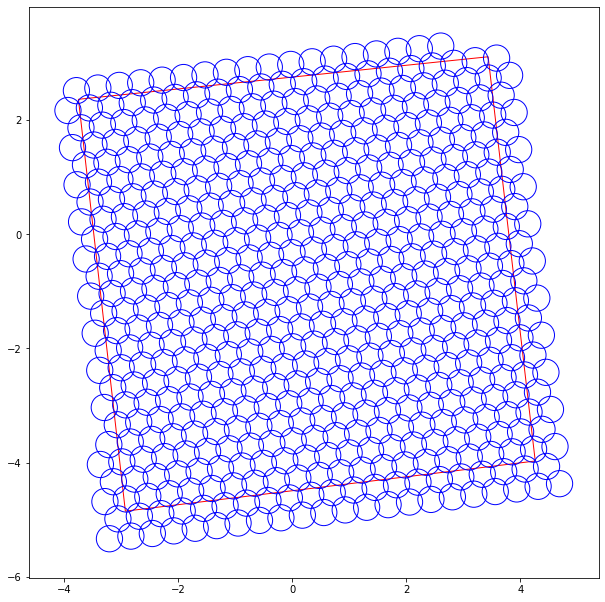

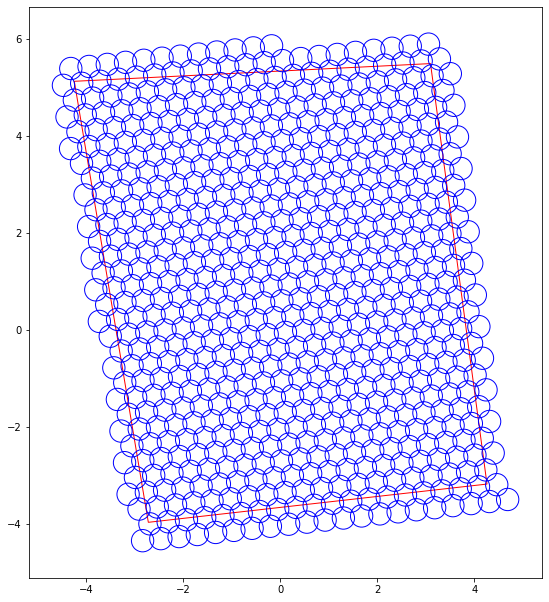

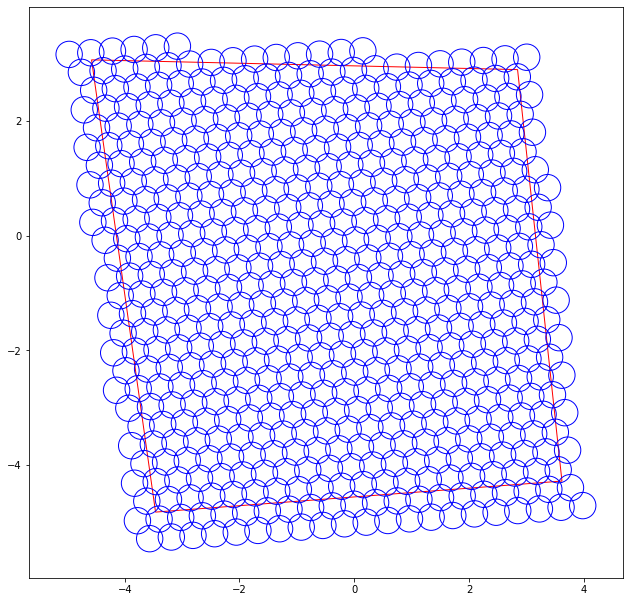

In [102]:
for lamella in [lamella2,lamella3,lamella4]:
    lamella.calculate_acquisition_positions()
    lamella.plot_acquisition_positions()
    lamella.write_to_disk()

In [ ]:
for lamella in [lamella4]:
    fowl.serialem.LongOperation("Da","2")
    fowl.serialem.SetFolderForFrames(os.path.join(os.path.abspath(lamella.directory),"frames/"))
    fowl.serialem.GoToLowDoseArea('V')
    fowl.serialem.SetDefocus(-20)
    lamella.move_to_position()
    fowl.serialem.GoToLowDoseArea('R')
    fowl.serialem.SetDefocus(0)
    fowl.serialem.ManageDewarsAndPumps(-1)
    while fowl.serialem.AreDewarsFilling():
        time.sleep(60)
    lamella.acquire_single_tilt_slow(tilt=-15.0)
    lamella.write_to_disk()
    

In [ ]:
lamella3.acquire_single_tilt_slow(tilt=-15.0)

In [113]:
lamella3.write_to_disk()

In [111]:
fowl.serialem.SetDefocus(-2)

In [95]:
fowl.serialem.ImageMetadataToVar('K','meta')

In [96]:
fowl.serialem.GetVariable('meta')

'[ImageMetadata = 11]\nMinMaxMean = 0 3752 760.277\nTiltAngle = -14.9912\nStagePosition = 97.7193 -88.1955\nStageZ = -18.1536\nMagnification = 2250\nIntensity = 0.259155\nExposureDose = 0\nDoseRate = 12.1921\nPixelSpacing = 76.8\nSpotSize = 8\nDefocus = -20\nImageShift = 0 0\nRotationAngle = 175.5\nExposureTime = 0.59654\nBinning = 2\nCameraIndex = 1\nDividedBy2 = 0\nOperatingMode = 1\nUsingCDS = 0\nMagIndex = 17\nLowDoseConSet = 1\nCountsPerElectron = 32\nTargetDefocus = -4\nDateTime = 30-Oct-21  11:41:38\nFilterSlitAndLoss = 40 0\nUncroppedSize = -2880 -2046'

In [17]:
crossgrating = fowl.fowl_grid(name="crossgrating",directory="crossgrating",beam_radius=0.23)

In [21]:
crossgrating.add_current_setting("tomography_fringe")

In [22]:
crossgrating.state

{'acquisition_areas': [],
 'microscope_settings': {'template_matching_fringe': {'magnification': (64000.0,
    0.0),
   'magnification_index': (29.0, 0.0),
   'spot_size': 8.0,
   'illuminated_area': 0.004899999999999981,
   'beam_tilt': (6.026626485675573, 0.7933238287856803),
   'objective_stigmator': (0.003612537028718898, 0.0017618232692640234),
   'fringe_free': False},
  'tomography_fringe': {'magnification': (33000.0, 0.0),
   'magnification_index': (26.0, 0.0),
   'spot_size': 9.0,
   'illuminated_area': 0.009837474667845071,
   'beam_tilt': (7.170783671826124, 1.0747994335303084),
   'objective_stigmator': (0.0016162046857496441, -0.007289339538472522),
   'fringe_free': False}}}

In [28]:
fowl.serialem.UpdateLowDoseParams('R',1)
fowl.serialem.SetMag(crossgrating.state['microscope_settings']['template_matching_fringe']['magnification'][0])
fowl.serialem.SetSpotSize(int(crossgrating.state['microscope_settings']['template_matching_fringe']['spot_size']))
fowl.serialem.SetIlluminatedArea(crossgrating.state['microscope_settings']['template_matching_fringe']['illuminated_area'])
fowl.serialem.SetBeamTilt(crossgrating.state['microscope_settings']['template_matching_fringe']['beam_tilt'][0],crossgrating.state['microscope_settings']['template_matching_fringe']['beam_tilt'][1])
fowl.serialem.SetObjectiveStigmator(crossgrating.state['microscope_settings']['template_matching_fringe']['objective_stigmator'][0],crossgrating.state['microscope_settings']['template_matching_fringe']['objective_stigmator'][1])

In [18]:
crossgrating.load_from_disk()

Loading file crossgrating\crossgrating_20211030-093848.npy


In [20]:
fowl.serialem.GoToLowDoseArea('R')

46 e/pix/s => 1.15 s for 30e/A
tomo 56 e/pix/s => 

In [ ]:
test1 = fowl.fowl_acquisition_area(name="test1",directory="./crossgrating/test1/",beam_radius=0.23,start_from=0.0,defocus=-0.8)

In [ ]:
test1.initialize_from_navigator(item=1)

In [ ]:
test1.load_from_disk()

In [ ]:
test1.calculate_acquisition_positions()

In [ ]:
test1.plot_acquisition_positions()

In [ ]:
test1.acquire_single_tilt_slow(tilt=0.0)

In [ ]:
while fowl.serialem.AreDewarsFilling():
    time.sleep(60)

In [ ]:
fowl.serialem.Exit(0)

In [ ]:
lamella1 = fowl.fowl_acquisition_area(name="grid4_lamella1",directory="./grid4/lamella1/",beam_radius=0.45,start_from=-15.0,load_from_file=False)

In [ ]:
lamella1.initialize_from_navigator(item=8)

In [ ]:
lamella1.write_to_disk()

In [ ]:
fowl.serialem.TiltTo(0.0)

In [ ]:
lamella1.move_to_position()

In [ ]:
lamella1.calculate_acquisition_positions()

In [ ]:
lamella1.designate_calibration_positions()

In [ ]:
lamella1.plot_acquisition_positions()

In [ ]:
lamella1.perform_defocus_calibration(-15.0,use_existing_tilt=False)

In [ ]:
lamella1.analyze_defocus_calibration(-15.0)

In [ ]:
lamella1.acquire_data(-15.0)

In [ ]:
lamella1.write_to_disk()

In [ ]:
for i in range(32):
    i+=3
    tilt = lamella1.state["tilts"][i]
    fowl.serialem.ManageDewarsAndPumps(-1)
    while fowl.serialem.AreDewarsFilling():
        time.sleep(5)
    lamella1.perform_defocus_calibration(tilt,use_existing_tilt=True)
    lamella1.analyze_defocus_calibration(tilt)
    lamella1.acquire_data(tilt)
    lamella1.write_to_disk()

In [ ]:
lamella2 = fowl.fowl_acquisition_area(name="grid4_lamella2",directory="./grid4/lamella2/",beam_radius=0.45,start_from=-15.0,load_from_file=False)
lamella3 = fowl.fowl_acquisition_area(name="grid4_lamella3",directory="./grid4/lamella3/",beam_radius=0.45,start_from=-15.0,load_from_file=False)
lamella4 = fowl.fowl_acquisition_area(name="grid4_lamella4",directory="./grid4/lamella4/",beam_radius=0.45,start_from=-15.0,load_from_file=False)
lamella5 = fowl.fowl_acquisition_area(name="grid4_lamella5",directory="./grid4/lamella5/",beam_radius=0.45,start_from=-15.0,load_from_file=False)
lamellas = [lamella2,lamella3,lamella4,lamella5]

In [ ]:
for lamella in lamellas:
    lamella.write_to_disk()

In [ ]:
lamella2.initialize_from_navigator(item=13)
lamella3.initialize_from_navigator(item=18)
lamella4.initialize_from_navigator(item=23)
lamella5.initialize_from_navigator(item=28)

In [ ]:
for lamella in lamellas:
    lamella.calculate_acquisition_positions()
    lamella.designate_calibration_positions()
    lamella.plot_acquisition_positions()
    lamella.write_to_disk()

In [ ]:
for lamella in lamellas:
    fowl.serialem.LongOperation("Da","2")
    fowl.serialem.SetFolderForFrames(os.path.join(os.path.abspath(lamella.directory),"frames/"))
    lamella.move_to_position()
    fowl.serialem.ManageDewarsAndPumps()
    while fowl.serialem.AreDewarsFilling():
        time.sleep(5)
    lamella.perform_defocus_calibration(-15.0,use_existing_tilt=False)
    lamella.analyze_defocus_calibration(-15.0)
    lamella.acquire_data(-15.0)
    lamella.write_to_disk()
    for i in range(34):
        i+=1
        tilt = lamella1.state["tilts"][i]
        #fowl.serialem.ManageDewarsAndPumps(-1)
        while fowl.serialem.AreDewarsFilling():
            time.sleep(5)
        lamella.perform_defocus_calibration(tilt,use_existing_tilt=True)
        lamella.analyze_defocus_calibration(tilt)
        lamella.acquire_data(tilt)
        lamella.write_to_disk()
    

In [ ]:
import os

In [ ]:
fowl.serialem.LongOperation("Da","2")

In [ ]:
for i in range(3):
    lamella = lamellas[i+1]
    fowl.serialem.SetFolderForFrames(os.path.join(os.path.abspath(lamella.directory),"frames/"))
    lamella.move_to_position()
    fowl.serialem.ManageDewarsAndPumps(-1)
    while fowl.serialem.AreDewarsFilling():
        time.sleep(5)
    lamella.perform_defocus_calibration(-15.0,use_existing_tilt=False)
    lamella.analyze_defocus_calibration(-15.0)
    lamella.acquire_data(-15.0)
    lamella.write_to_disk()
    for i in range(34):
        i+=1
        tilt = lamella1.state["tilts"][i]
        fowl.serialem.ManageDewarsAndPumps(-1)
        while fowl.serialem.AreDewarsFilling():
            time.sleep(5)
        lamella.perform_defocus_calibration(tilt,use_existing_tilt=True)
        lamella.analyze_defocus_calibration(tilt)
        lamella.acquire_data(tilt)
        lamella.write_to_disk()
    fowl.serialem.LongOperation("Da","2")

In [ ]:
fowl.serialem.SetColumnOrGunValve(1)

In [ ]:
for lamella in lamellas:
    lamella.move_to_position()
    fowl.serialem.CallScript(35)

In [ ]:
fowl.serialem.Exit(1)